In [83]:
# Importing required libraries for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [84]:
# Set plot style
plt.style.use('default')

# Set plot properties
plt.rcParams['figure.figsize']=(8,6)
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize']=14
plt.rcParams['axes.titlesize']=12
plt.rcParams['axes.titleweight']='bold'
plt.rcParams['axes.labelpad']=14
plt.rcParams['axes.titlepad']=14
plt.rcParams['legend.frameon']=True

In [85]:
# Reading data into pandas for analysis
url='https://drive.google.com/uc?id=1fOykd19tnDQHggx-s9fLGRkIfm521Q2a&export=download'
members = pd.read_csv(url)

# Show 10 random data
members.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
734,27,Male,102.6,1.83,199,123,58,1.41,954.0,HIIT,26.5,3.5,3,2,30.64
385,59,Female,42.1,1.65,172,132,59,1.22,725.0,Strength,33.0,2.2,2,1,15.46
107,54,Male,86.0,1.93,171,163,51,1.74,1404.0,Strength,12.9,3.5,5,3,23.09
869,55,Female,49.3,1.76,194,161,73,1.28,927.0,Strength,30.5,2.0,2,1,15.92
936,54,Male,117.2,1.62,172,143,56,1.04,736.0,HIIT,23.1,2.3,4,2,44.66
96,56,Male,129.0,1.78,194,126,64,1.29,805.0,Yoga,27.1,2.7,2,1,40.71
746,40,Male,68.9,1.99,180,149,51,1.16,951.0,Cardio,25.0,2.4,4,2,17.40
542,46,Male,84.3,2.00,189,162,66,1.83,1467.0,HIIT,13.3,3.5,5,3,21.07
543,28,Female,62.4,1.60,178,129,62,1.10,710.0,Strength,34.1,1.7,3,2,24.37
534,56,Male,84.6,1.63,184,141,52,1.01,705.0,HIIT,20.2,2.9,4,2,31.84


In [86]:
# Check if data has null values
members.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [87]:
# Check for duplicates in the data
print(f' This dataset has {members.duplicated().sum()} duplicates')

 This dataset has 0 duplicates


In [88]:
# Display general information about dataset
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [89]:
# Drop columns not needed in this analysis
members.drop(columns=['Height (m)','Max_BPM','Avg_BPM','Resting_BPM','Water_Intake (liters)','BMI'], inplace=True)

# Rename columns
members.rename(columns={
    'Calories_Burned':'Calories Burned',
    'Weight (kg)':'Weight(kg)',
    'Workout_Type':'Workout Type',
    'Fat_Percentage':'Fat Percentage',
    'Session_Duration (hours)':'Session Duration(hours)',
    'Workout_Frequency (days/week)':'Workout Frequency(days/week)',
    'Experience_Level':'Experience Level'
    }, inplace=True)

# Display new columns
members.columns

Index(['Age', 'Gender', 'Weight(kg)', 'Session Duration(hours)',
       'Calories Burned', 'Workout Type', 'Fat Percentage',
       'Workout Frequency(days/week)', 'Experience Level'],
      dtype='object')

In [90]:
# Display summary statistics about gym members
members.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.68,12.18,18.0,28.00,40.00,49.00,59.0
Weight(kg),973.0,73.85,21.21,40.0,58.10,70.00,86.00,129.9
Session Duration(hours),973.0,1.26,0.34,0.5,1.04,1.26,1.46,2.0
Calories Burned,973.0,905.42,272.64,303.0,720.00,893.00,1076.00,1783.0
Fat Percentage,973.0,24.98,6.26,10.0,21.30,26.20,29.30,35.0
Workout Frequency(days/week),973.0,3.32,0.91,2.0,3.00,3.00,4.00,5.0
Experience Level,973.0,1.81,0.74,1.0,1.00,2.00,2.00,3.0


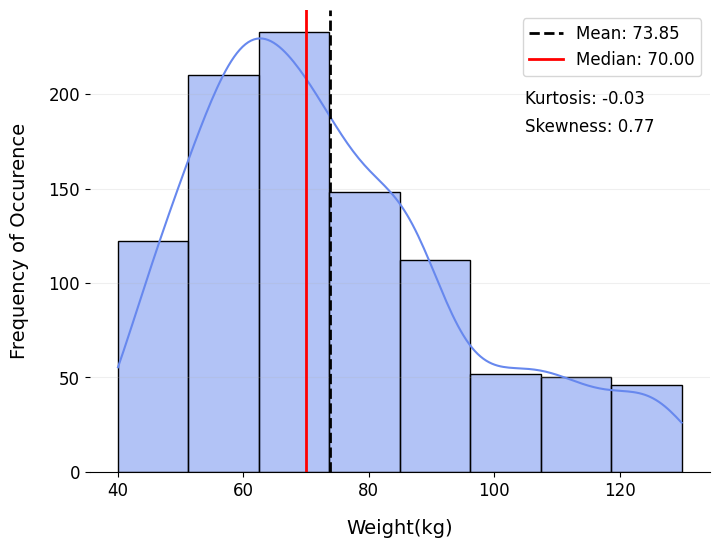

In [112]:
def histplot():
    '''
    Plot histogram to show the weight distribution of gym members
    '''
    
    sns.histplot(x='Weight(kg)', data=members, bins=8, color='#6788EE', edgecolor='black', kde=True)

    # Calculate mean, median, kurtosis and skewness of the weight distribution
    mean = members['Weight(kg)'].mean()
    median = members['Weight(kg)'].median()
    kurtosis = ss.kurtosis(members['Weight(kg)'], fisher=True)
    skewness = ss.skew(members['Weight(kg)'])

    # Display mean, median, kurtosis and skewness of the weight distribution
    plt.axvline(mean, ls='--', lw=2, color='black', label=f'Mean: {mean:.2f}')
    plt.axvline(median, ls='-', lw=2, color='red', label=f'Median: {median:.2f}')
    plt.annotate(f'Kurtosis: {kurtosis:.2f}',xy=(105,195))
    plt.annotate(f'Skewness: {skewness:.2f}',xy=(105,180))

    # Set plot attribute
    #plt.title('Histogram of members\' weight (in kg)')
    plt.grid(axis='y', alpha=0.2)
    plt.ylabel('Frequency of Occurence')
    plt.legend(loc='upper right')
    sns.despine(right=True, top=True, left=True)
    
    # Save plot as image
    plt.savefig('DHVhistogram.png', dpi=300)
    
    plt.show()
    return

# Display histogram of gym member weight distribution
histplot()

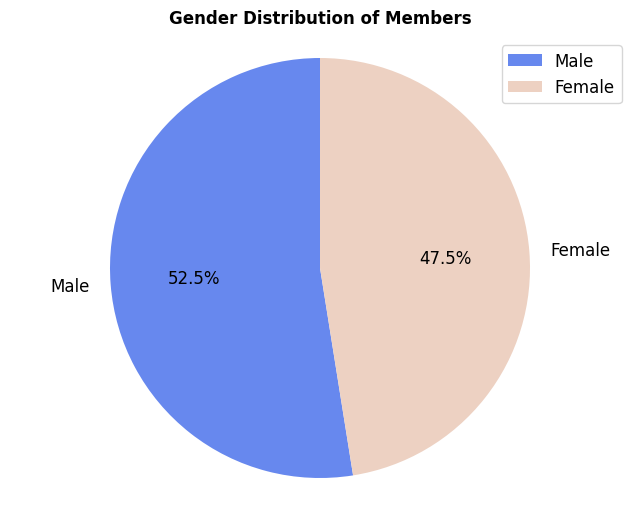

In [92]:
def gender_distribution():
    '''
    Plot the frequency occupied by each workout type classified by gender
    '''
    plt.pie(members['Gender'].value_counts(), colors=['#6788EE','#EDD1C2'], 
            labels=members['Gender'].unique(), autopct='%1.1f%%', startangle=90)

    # Set plot attributes
    plt.axis('equal')
    plt.title('Gender Distribution of Members',pad=10)
    plt.legend()
    
    
    # Save plot as image
    #plt.savefig('GenderPie.png', dpi=300)
    
    plt.show()
    return

# Display the countplot
gender_distribution()

In [93]:
'''
Creating age groups of members for further analysis
'''
# Step 1: Create labels for age groups
labels = ['Young Adults', 'Early Middle Age', 'Late Middle Age', 'Seniors']

# Step 2: Create bins for age groups
bins = [18,29,39,49,59]

# Step 3: Create age groups for gym members
members['Age Group'] = pd.cut(members['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

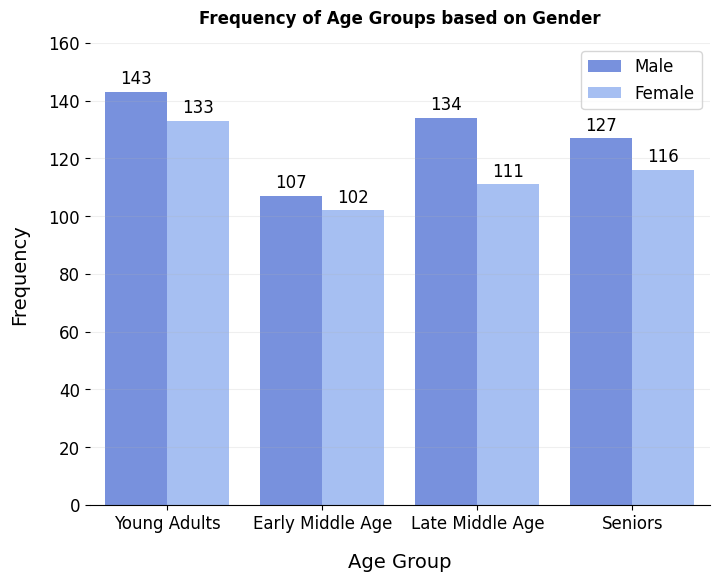

In [94]:
def count_age_groups():
    '''
    Plot the frequency occupied by each age groups based on gender within them
    '''
    sns.countplot(x='Age Group', palette=sns.color_palette('coolwarm'), hue='Gender', data=members, legend='auto')

    # Add each bar counts
    ax = plt.gca()
    for count in ax.containers:
        ax.bar_label(count, weight='medium', fontsize=12, padding=3)
    
    # Set plot attributes
    plt.ylabel('Frequency')
    plt.ylim(0,160)
    plt.title('Frequency of Age Groups based on Gender')
    plt.legend(loc='upper right')
    plt.grid(axis='y', alpha=0.2)
    sns.despine(right=True, top=True, left=True)
    
    # Save plot as image
    #plt.savefig('AgeGroupDistribution.png', dpi=300)
    
    plt.show()
    return

# Display the countplot
count_age_groups()

In [95]:
# Calculate the mean and median ages of each gender based on workout type
gender_workout_avg_age = members.pivot_table(index='Workout Type', columns='Gender', values='Age', aggfunc={'mean','median'}).round(2)

# Display the mean and median ages of members categorized by Gender and Workout Type
gender_workout_avg_age

mean        median      
Gender       Female   Male Female  Male
Workout Type                           
Cardio        37.02  38.31   35.0  39.0
HIIT          39.56  38.37   41.0  39.5
Strength      38.73  39.15   39.0  39.0
Yoga          38.21  40.05   40.0  42.0

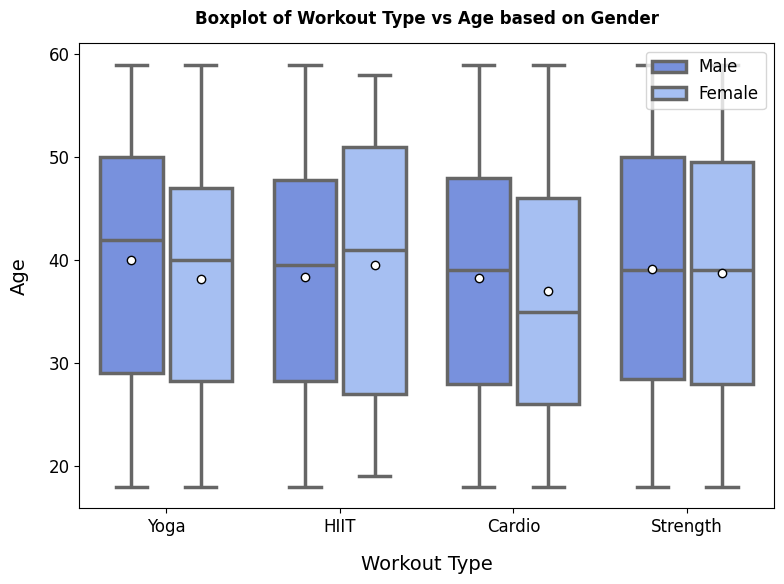

In [96]:
def workout_age_spread():
    '''
    Plot the spread of data for different workout type based on age and classified by Gender using boxplot
    '''
    sns.boxplot(x= 'Workout Type', y='Age',data=members, hue='Gender', palette=sns.color_palette('coolwarm'), 
                linewidth=2.5, legend='auto', gap=0.1, showmeans=True, 
                meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'})

    # Set plot attributes
    plt.title('Boxplot of Workout Type vs Age based on Gender')
    plt.legend(loc='upper right')
    plt.tight_layout()
    
    # Save plot as image
    #plt.savefig('WorkoutType_GenderBox.png', dpi=300)
    
    return

# Display the boxplot diagram
workout_age_spread()

In [97]:
'''
Calculate the mean and median ages based on each workout type
'''
# Create a pivot table to calculate the mean and median ages based on workout type
avg_workout_age = members.pivot_table(index='Workout Type', values='Age', aggfunc={'mean','median'}).round(2).reset_index().T

# Set the first row as the column header
avg_workout_age.columns = avg_workout_age.iloc[0]

# Drop the first row
avg_workout_age = avg_workout_age.drop(index='Workout Type')

# Display the mean and median ages based on workout type
avg_workout_age

Workout Type,Cardio,HIIT,Strength,Yoga
mean,37.67,38.95,38.95,39.23
median,37.0,40.0,39.0,41.0


In [98]:
'''
Calculate the average values of calories burned and session duration based on workout type by each gender
'''

# Create a pivot table to calculate the average values of calories burned and session duration 
# based on workout type and categorized by Gender
avg_session_calories = members.pivot_table(columns='Gender', index='Workout Type', 
                                           values=['Session Duration(hours)','Calories Burned'], 
                                           aggfunc='mean').round(2)

# Display the table
avg_session_calories

Calories Burned         Session Duration(hours)      
Gender                Female    Male                  Female  Male
Workout Type                                                      
Cardio                834.79  933.08                    1.21  1.23
HIIT                  869.95  978.23                    1.27  1.30
Strength              863.10  954.07                    1.28  1.25
Yoga                  886.12  916.79                    1.30  1.23

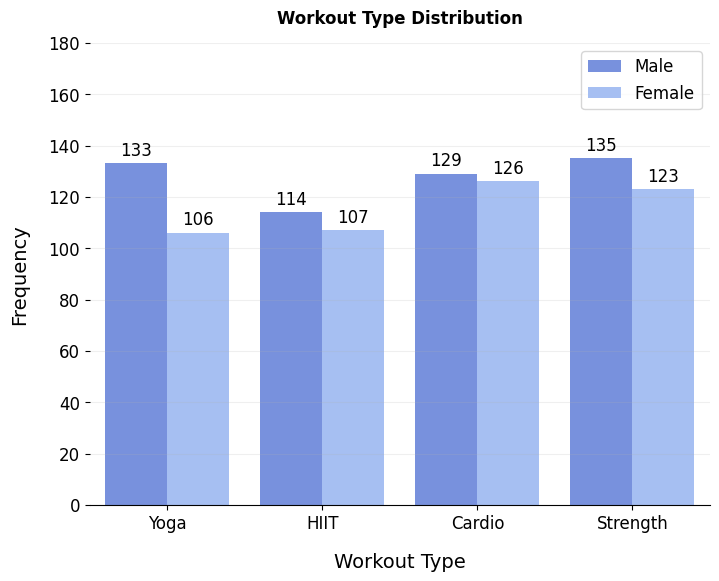

In [99]:
def count_gender_workout():
    '''
    Plot the frequency occupied by each workout type classified by gender
    '''
    sns.countplot(x='Workout Type', palette=sns.color_palette('coolwarm'), hue='Gender', data=members, legend='auto')

    # Add each bar counts
    ax = plt.gca()
    for count in ax.containers:
        ax.bar_label(count, weight='medium', fontsize=12, padding=3)
    
    # Set plot attributes
    plt.ylabel('Frequency')
    plt.ylim(0,180)
    plt.title('Workout Type Distribution')
    plt.legend(loc='upper right')
    plt.grid(axis='y', alpha=0.2)
    sns.despine(right=True, top=True, left=True)
    
    # Save plot as image
    #plt.savefig('WorkType Distribution.png', dpi=300)
    
    plt.show()
    return

# Display the countplot
count_gender_workout()

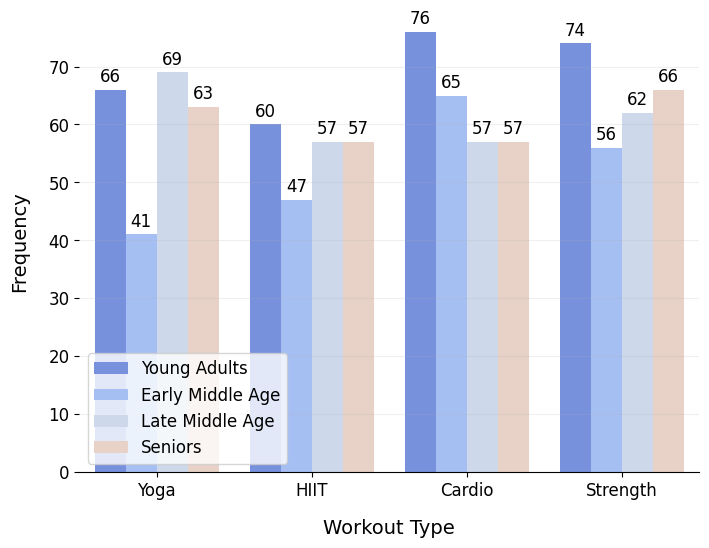

In [124]:
def count_group_workout():
    '''
    Plot the frequency occupied by each workout type classified by gender
    '''
    sns.countplot(x='Workout Type', palette=sns.color_palette('coolwarm'), hue='Age Group', data=members, legend='auto')

    # Add each bar counts
    ax = plt.gca()
    for count in ax.containers:
        ax.bar_label(count, weight='medium', fontsize=12, padding=3)
    
    # Set plot attributes
    plt.ylabel('Frequency')
    plt.title('Workout Type Distribution based on age group')
    plt.legend(loc='best')
    plt.grid(axis='y', alpha=0.2)
    sns.despine(right=True, top=True, left=True)
    
    # Save plot as image
    #plt.savefig('WorkType Age group Distribution.png', dpi=300)
    
    plt.show()
    return

# Display the countplot
count_group_workout()

In [100]:
'''
Convert the experience level to categorical values for further analysis
'''

# Step 1: Convert the 'Experience Level' column to string and store it in a variable named 'experience'
members['Experience Level'] = members['Experience Level'].astype(str)
experience = members['Experience Level'].values

# Step 2: Use a for loop to change the values named '1', '2', and '3' to 'Beginner', 'Intermediate', and 'Expert' respectively
for i, level in enumerate(experience):
    if level == '1':
        experience[i]='Beginner'
    elif level == '2':
        experience[i]='Intermediate'
    else:
        experience[i]='Expert'

# Step 3: Assign the new values to the 'Experience Level' column in the members dataset
members['Experience Level'] = experience

In [101]:
# Calculate the number of members in each experience level categorized by gender
gender_experience = pd.crosstab(members['Experience Level'], members['Gender'],margins=True, margins_name='Total')

# Display the number of members in each experience level categorized
gender_experience

Gender,Female,Male,Total
Experience Level,,,
Beginner,179,197,376
Expert,90,101,191
Intermediate,193,213,406
Total,462,511,973


In [102]:
# Drop Total column in Gender experience dataset since we are not using them for analysis
gender_experience.drop(columns={'Total'}, index='Total', inplace=True)

# Display Gender experience table after cleaning
gender_experience

Gender,Female,Male
Experience Level,,
Beginner,179,197
Expert,90,101
Intermediate,193,213


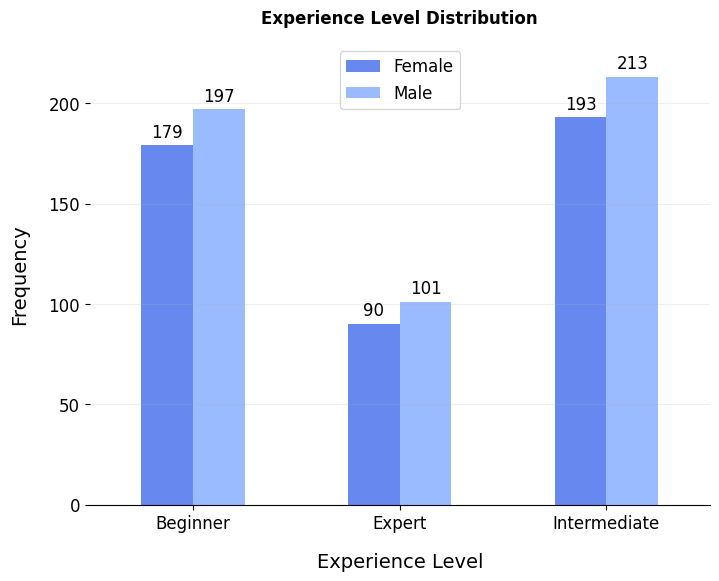

In [103]:
def plot_gender_experience():
    '''
    Plot the number of members in each experience level categorized by Gender
    '''
   
    gender_experience.plot(kind='bar', stacked=False, color=sns.color_palette('coolwarm'))
   
   
    # Add each bar counts
    ax = plt.gca()
    for count in ax.containers:
        ax.bar_label(count, weight='medium', fontsize=12, padding=3)
     
    # Set plot attributes
    plt.title('Experience Level Distribution')
    plt.ylabel('Frequency')
    plt.ylim(0,230)
    plt.xticks(rotation=0)
    plt.legend(loc='best')
    plt.grid(axis='y', alpha=0.2)
    sns.despine(right=True, top=True, left=True)
    
    # Save plot as image
    #plt.savefig('Experience Level Distribution.png', dpi=300)
    
    plt.show()
    return

# Display the bar chart
plot_gender_experience()

In [104]:
'''
Group experience level based on gender and their preferred workout type count
'''

# Step 1: Create a copy of the Gender column and store it in a new column
members['Gender Copy'] = members['Gender'].copy()

# Step 2: Create a pivot table to show the number of members in each experience level based on Workout Type and Gender
workout_experience = members.pivot_table(columns=['Gender','Workout Type'], index='Experience Level', 
                                         values='Gender Copy', aggfunc='count')

# Step 3: Display pivot table
workout_experience

Gender           Female                      Male                   
Workout Type     Cardio HIIT Strength Yoga Cardio HIIT Strength Yoga
Experience Level                                                    
Beginner             59   41       47   32     50   44       50   53
Expert               22   19       22   27     22   30       23   26
Intermediate         45   47       54   47     57   40       62   54

In [105]:
# Drop Gender copy column from members dataset
members.drop(columns=['Gender Copy'], inplace=True)

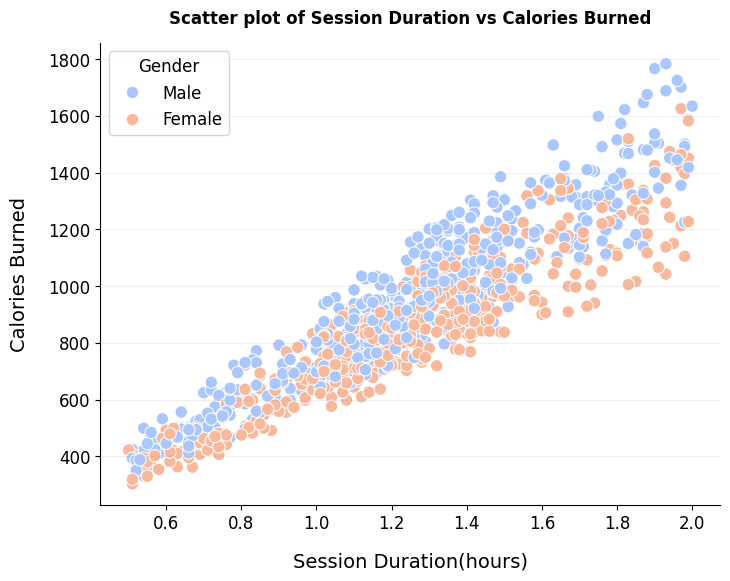

In [106]:
def plot_scatter():
    '''
    Plot the correction of session duration and calories burned
    '''
    
    sns.scatterplot(x='Session Duration(hours)', y='Calories Burned', data=members, hue='Gender', palette='coolwarm', s=80)
    
    # Set plot attributes
    plt.title('Scatter plot of Session Duration vs Calories Burned')
    plt.grid(axis='y', alpha=0.2)
    sns.despine(right=True, top=True)
    
    # Save plot as image
    #plt.savefig('SessionDurationScatter.png', dpi=300)
    
    plt.show()
    return

# Display the scatter plot
plot_scatter()

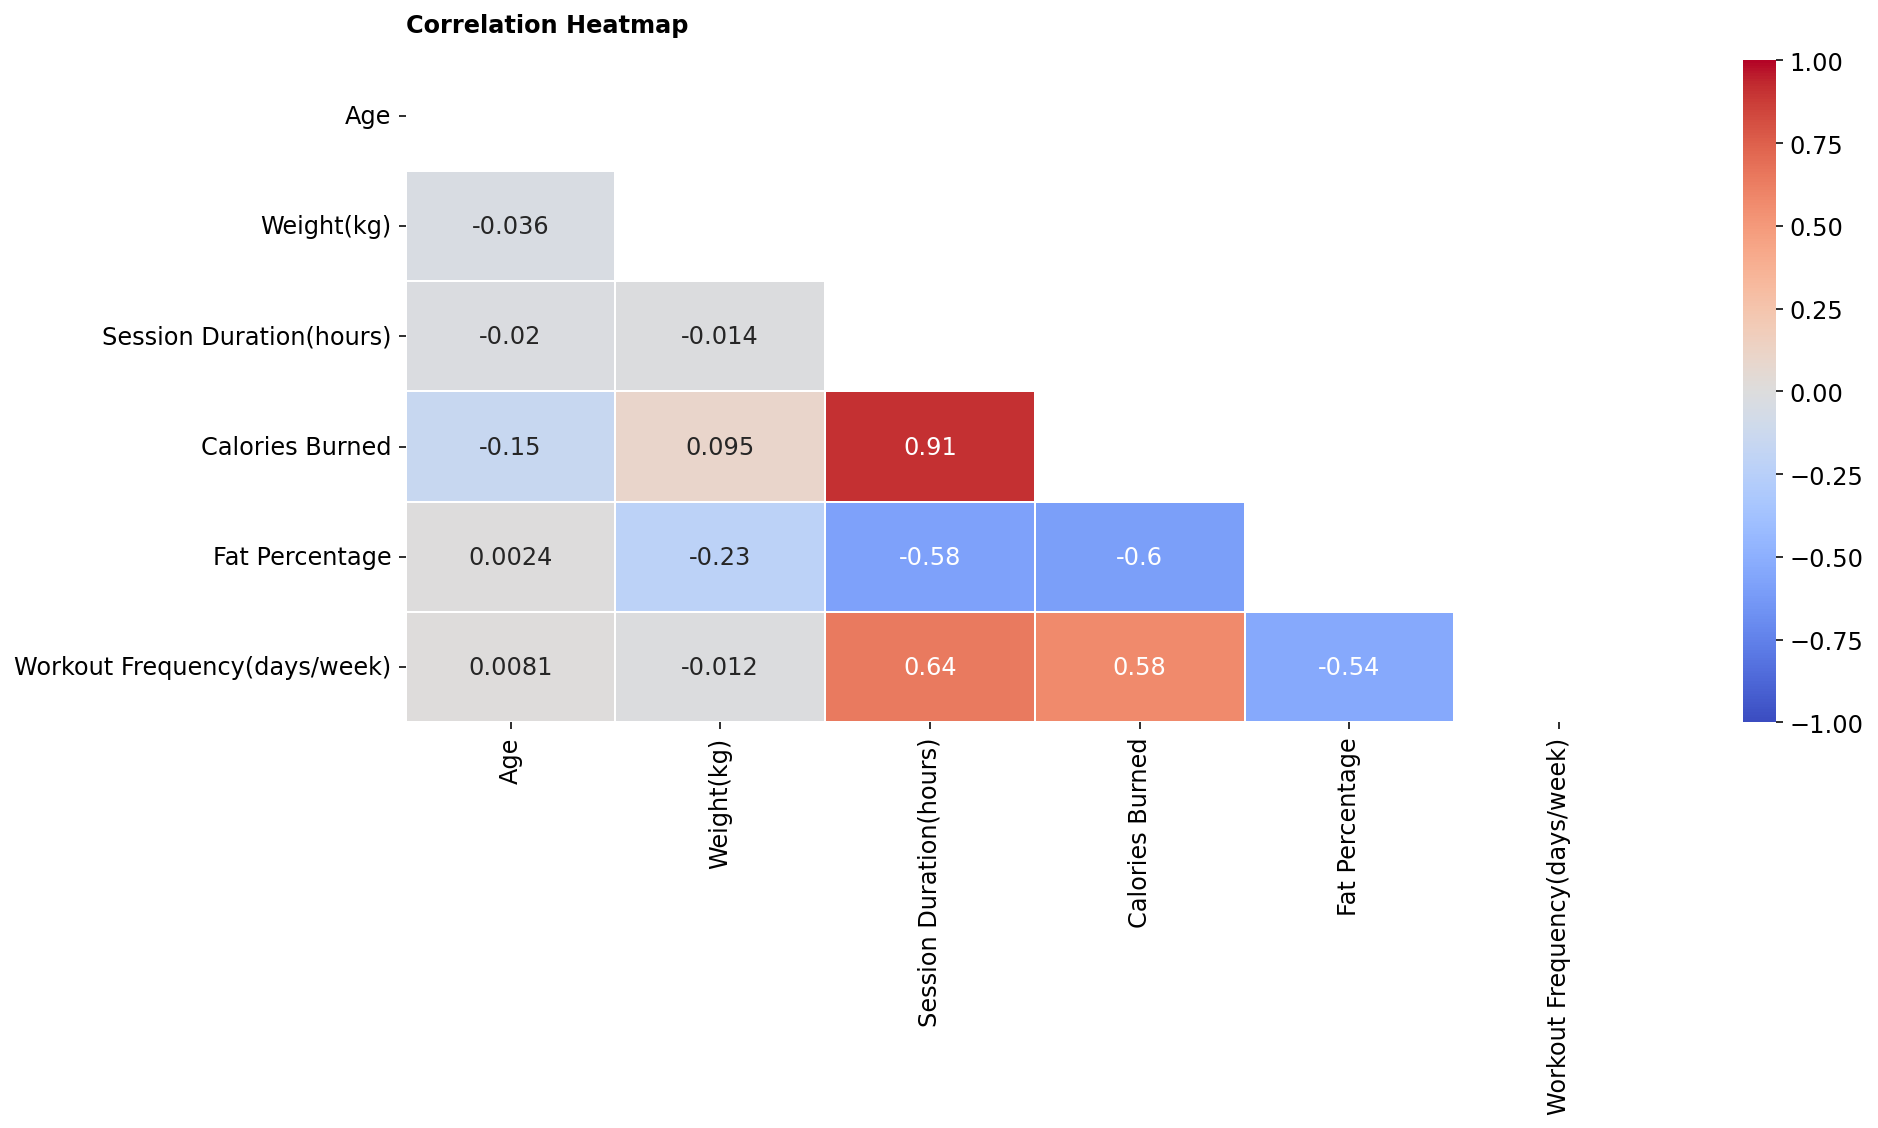

In [107]:
def plot_heatmap():
    '''
    Plot the heatmap of the correlation between numerical columns in the dataset
    '''
    
    # Step 1: Calculate the correlation between numerical columns in the dataset
    gym_corr = members.corr(numeric_only=True)
    
    # Step 2: Create a mask to hide the upper triangle of the heatmap
    mask = np.triu(np.ones_like(gym_corr))
    
    # Step 3: Plot the heatmap
    plt.figure(figsize=(14,8),dpi=144)
    sns.heatmap(gym_corr, cmap='coolwarm', annot=True, mask=mask, vmin=-1, vmax=1, lw=1)
    
    # Step 4: Set plot attributes
    plt.title('Correlation Heatmap', loc='left')
    plt.tight_layout()
    
    # Save plot as image
    #plt.savefig('HeatmapCorr.png', dpi=300)
    
    plt.show()
    return

# Display the heatmap
plot_heatmap()

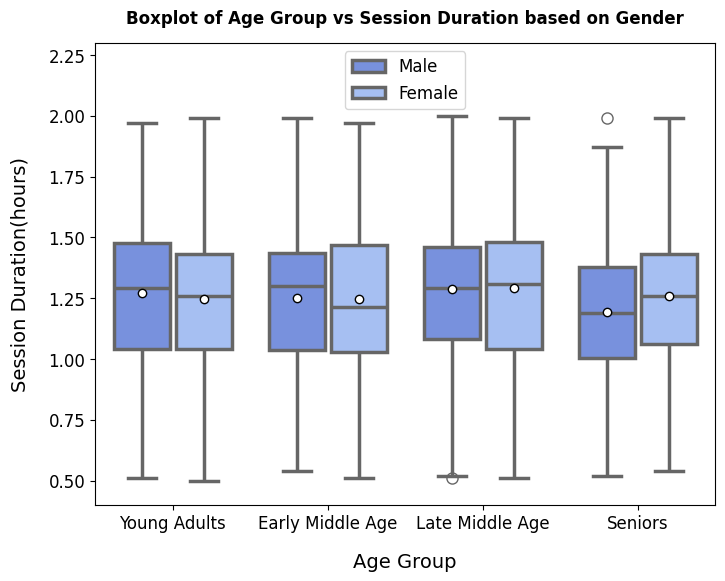

In [108]:
def plot_group_session():
    '''
    Understanding spread of session duration by each age group based on gender
    '''
    
    # Step 1: Plot the boxplot of session duration by each age
    sns.boxplot(x= 'Age Group', y='Session Duration(hours)', data=members, 
                hue='Gender', palette=sns.color_palette('coolwarm'), linewidth=2.5, 
                legend='auto', gap=0.1, showmeans=True, 
                meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}, fliersize=8)

    # Set plot attributes
    plt.ylim(0.4,max(members['Session Duration(hours)'])+0.3)
    plt.title('Boxplot of Age Group vs Session Duration based on Gender')
    plt.legend(loc='upper center')
    
    # Save plot as image
    #plt.savefig('AgeGroupSessionBox.png', dpi=300)
    
    plt.show()
    return

# Display the boxplot diagram
plot_group_session()

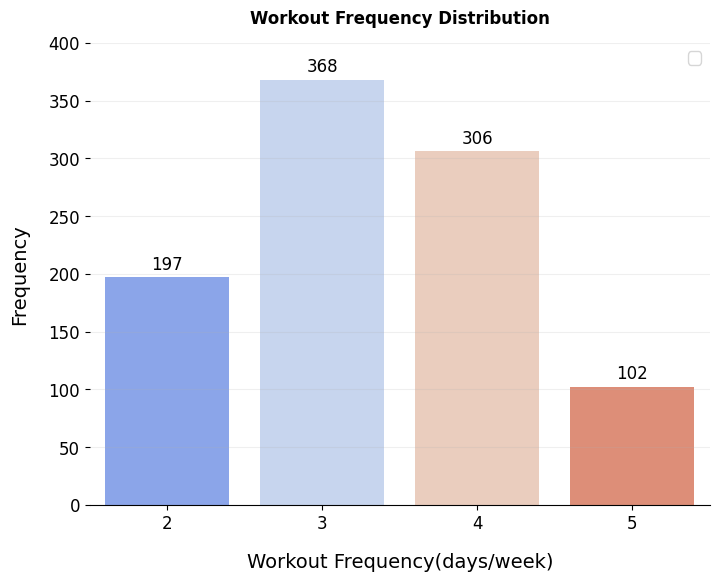

In [109]:
def plot_workout_freq():
    '''
    Plot the number of members in each experience level categorized by Gender
    '''
   # Plot the bar chart of workout frequency
    sns.countplot(x='Workout Frequency(days/week)', data=members, palette='coolwarm', legend='auto')
   
    # Add each bar counts
    ax = plt.gca()
    for count in ax.containers:
        ax.bar_label(count, weight='medium', fontsize=12, padding=3)
     
    # Set plot attributes
    plt.title('Workout Frequency Distribution')
    plt.ylabel('Frequency')
    plt.ylim(0,400)
    plt.legend(loc='upper right')
    plt.grid(axis='y', alpha=0.2)
    sns.despine(right=True, top=True, left=True)
    
    # Save plot as image
    #plt.savefig('WorkoutFreqDistribution.png', dpi=300)
     
    plt.show()
    return

# Display the bar chart
plot_workout_freq()

In [110]:
# Average workout frequency based on different age group
age_workout_freq = members.pivot_table(index='Age Group',values='Workout Frequency(days/week)', aggfunc='mean', observed=False).round(2)

# Display the average workout frequency based on different age group
age_workout_freq

,Workout Frequency(days/week)
Age Group,
Young Adults,3.28
Early Middle Age,3.35
Late Middle Age,3.40
Seniors,3.26


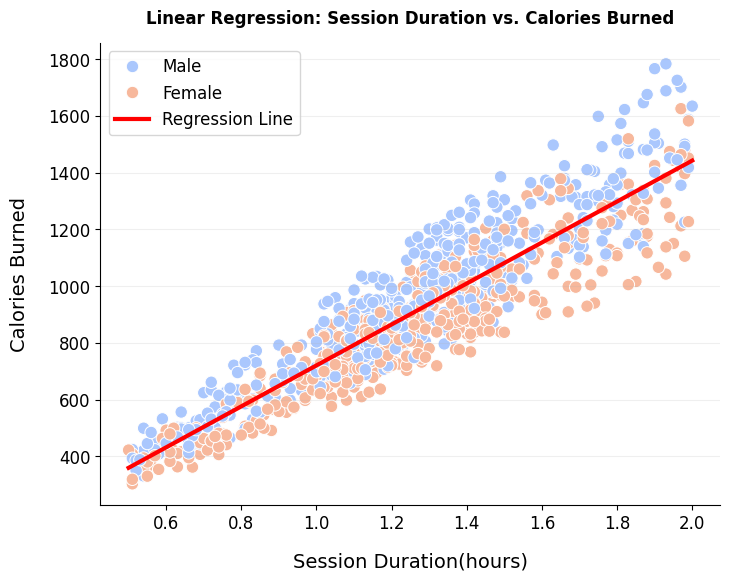

In [111]:
def regression_plot():
    '''
    Create a linear regression plot of session duration vs calories burned
    '''
    
    # Extract the relevant columns
    x = members['Session Duration(hours)']
    y = members['Calories Burned']

    # Fit a linear regression model using np.polyfit() and deg=1 for linear regression
    coeff = np.polyfit(x, y, deg=1)

    # Create a scatter plot of the data
    sns.scatterplot(x='Session Duration(hours)', y='Calories Burned', 
                    data=members, hue='Gender', palette='coolwarm', s=80)

    # Generate points for the regression line (generate 1000 points)
    x_line = np.linspace(x.min(), x.max(), 1000) 
    y_line = np.polyval(coeff, x_line)

    # Plot the regression line
    plt.plot(x_line, y_line, color='red',lw=3, label='Regression Line')

    # Set plot attributes
    plt.title('Linear Regression: Session Duration vs. Calories Burned')
    plt.legend()
    plt.grid(axis='y', alpha=0.2)
    sns.despine(right=True, top=True)
    
    # Save plot as image
    #plt.savefig('LinearRegression.png', dpi=300)

    plt.show()
    return

# Display the regression plot
regression_plot()